### In this notebook we show how to optimize Ridge Regression by means of Gradient Descent and Stochastic Gradient Descent

In [37]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

#!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
def load_data():
    """load data."""
    data = np.loadtxt("dataEx4.csv", delimiter=",", skiprows=1, unpack=True)
    x = data[0]
    y = data[1]
    return x, y

def standardise(x):
    """Standardise the original data set."""
    mean_x = np.mean(x, axis=0)
    x = x - mean_x
    std_x = np.std(x, axis=0)
    x = x / std_x
    return x, mean_x, std_x

def split_data(x, y, ratio, myseed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(myseed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te


def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = np.ones((len(x), 1))
    for deg in range(1, degree+1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly


#### Implementation


In [92]:
def get_grad_ridge(tx, y, w, lamb):
    err = y - tx.dot(w)
    grad = -err.dot(tx)/ len(err) + lamb*w
    return grad, err

def mse_ridge(e, lamb, w):
    """Calculate the mse for vector e."""
    return 1/2*np.mean(e**2)+1/2*lamb*w.dot(w) 

def compute_mse(y, tx, w):
    """compute the loss by mse."""
    err = y - tx.dot(w)
    return 1/2*np.mean(err**2)



def ridge_reg_GD(y, X, d, max_iters, gamma, lamb):
    tx = build_poly(X, d)
    initial_w = np.zeros(d+1)
    w = initial_w
    ws = [initial_w]
    losses = []
    for n_iter in range(max_iters):
        grad, err = get_grad_ridge(tx, y, w, lamb)
        loss = mse_ridge(err, lamb, w)
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)

    return w, tx

#### Let's test 

proportion=0.2, degree=2, lambda=0.00001, Training RMSE=0.4086, Testing RMSE=0.5556
proportion=0.2, degree=2, lambda=0.00001, Training RMSE=0.4086, Testing RMSE=0.5556
proportion=0.2, degree=2, lambda=0.00002, Training RMSE=0.4086, Testing RMSE=0.5556
proportion=0.2, degree=2, lambda=0.00003, Training RMSE=0.4086, Testing RMSE=0.5556
proportion=0.2, degree=2, lambda=0.00005, Training RMSE=0.4086, Testing RMSE=0.5555
proportion=0.2, degree=2, lambda=0.00007, Training RMSE=0.4087, Testing RMSE=0.5555
proportion=0.2, degree=2, lambda=0.00011, Training RMSE=0.4087, Testing RMSE=0.5554
proportion=0.2, degree=2, lambda=0.00016, Training RMSE=0.4087, Testing RMSE=0.5553
proportion=0.2, degree=2, lambda=0.00024, Training RMSE=0.4087, Testing RMSE=0.5551
proportion=0.2, degree=2, lambda=0.00036, Training RMSE=0.4088, Testing RMSE=0.5549
proportion=0.2, degree=2, lambda=0.00053, Training RMSE=0.4089, Testing RMSE=0.5545
proportion=0.2, degree=2, lambda=0.00079, Training RMSE=0.4090, Testing RMSE

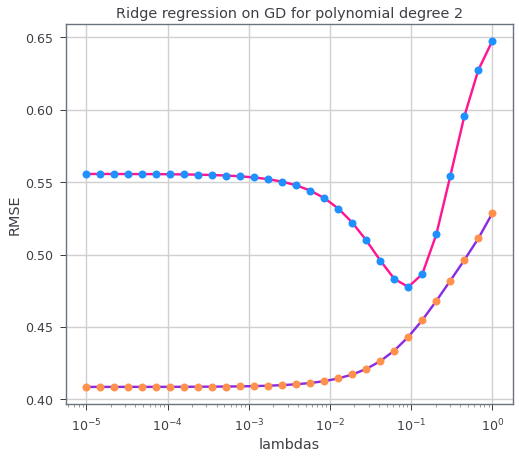

In [101]:
x, y = load_data()
x, mean_x, std_x = standardise(x)
d = 2
max_iters = 1000
gamma = 0.01
seed = 56
split_ratio = 0.2

def ridge_reg_GD_demo(x, y, split_ratio, seed, d, max_iters, gamma):
    #dataset
    x_tr, x_te, y_tr, y_te = split_data(x, y, split_ratio, seed)
    built_x_te = build_poly(x_te, d)
    lambdas = np.logspace(-5, 0, 30)
    rmse_tr = []
    rmse_te = []
    weights = []
    for ind, lamb in enumerate(lambdas):
        weight, built_x_tr = ridge_reg_GD(y_tr, x_tr, d, max_iters, gamma, lamb)
        weights.append(weight)
        rmse_tr.append(np.sqrt(2*compute_mse(y_tr, built_x_tr, weight)))
        rmse_te.append(np.sqrt(2*compute_mse(y_te, built_x_te, weight)))
        print("proportion={p}, degree={d}, lambda={l:.5f}, Training RMSE={tr:.4f}, Testing RMSE={te:.4f}".format(
            p=split_ratio, d=d, l=lamb, tr=rmse_tr[ind], te=rmse_te[ind]))
    plt.semilogx(lambdas, rmse_tr, color='blueviolet', marker='o',ms=8, mfc='y',  linewidth=2.4, label="Train error")
    plt.semilogx(lambdas, rmse_te, color='deeppink', marker='o',ms=8, mfc='dodgerblue',  linewidth=2.4, label="Test error")
    plt.xlabel("lambdas")
    plt.ylabel("RMSE")
    plt.title("Ridge regression on GD for polynomial degree " + str(d))
    
    
ridge_reg_GD_demo(x, y, split_ratio, seed, d, max_iters, gamma)

From the plot we can deduce optimal $\lambda$ parameter.

#### The same but with Stochastic Gradient Descent instead

index=0, proportion=0.2, degree=3, lambda=0.00001, Training RMSE=0.2215, Testing RMSE=0.7316
index=1, proportion=0.2, degree=3, lambda=0.00001, Training RMSE=0.2192, Testing RMSE=0.7372
index=2, proportion=0.2, degree=3, lambda=0.00002, Training RMSE=0.2240, Testing RMSE=0.6823
index=3, proportion=0.2, degree=3, lambda=0.00003, Training RMSE=0.2193, Testing RMSE=0.6753
index=4, proportion=0.2, degree=3, lambda=0.00005, Training RMSE=0.2188, Testing RMSE=0.6584
index=5, proportion=0.2, degree=3, lambda=0.00007, Training RMSE=0.2172, Testing RMSE=0.7374
index=6, proportion=0.2, degree=3, lambda=0.00011, Training RMSE=0.2188, Testing RMSE=0.6572
index=7, proportion=0.2, degree=3, lambda=0.00016, Training RMSE=0.2224, Testing RMSE=0.6646
index=8, proportion=0.2, degree=3, lambda=0.00024, Training RMSE=0.2236, Testing RMSE=0.6576
index=9, proportion=0.2, degree=3, lambda=0.00036, Training RMSE=0.2275, Testing RMSE=0.6264
index=10, proportion=0.2, degree=3, lambda=0.00053, Training RMSE=0.21

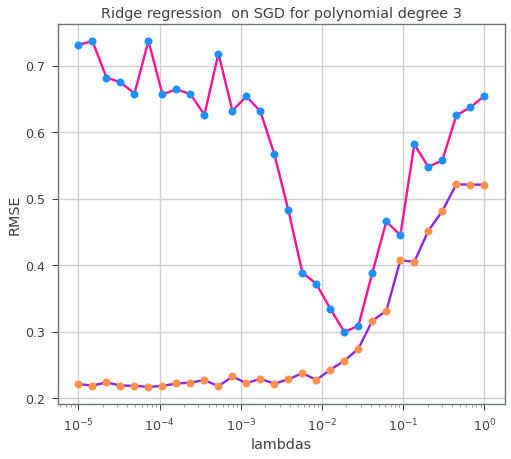

In [105]:
def batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
    data_size = len(y)

    if shuffle:
        shuffle_indices = np.random.permutation(np.arange(data_size))
        shuffled_y = y[shuffle_indices]
        shuffled_tx = tx[shuffle_indices]
    else:
        shuffled_y = y
        shuffled_tx = tx
    for batch_num in range(num_batches):
        start_index = batch_num * batch_size
        end_index = min((batch_num + 1) * batch_size, data_size)
        if start_index != end_index:
            yield shuffled_y[start_index:end_index], shuffled_tx[start_index:end_index]

def ridge_reg_SGD(y, X, d, max_iters, gamma, lamb, batch_size):
    tx = build_poly(X, d)
    initial_w = np.zeros(d+1)
    w = initial_w
    ws = [initial_w]
    losses = []
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1, shuffle=True):
            grad, err = get_grad_ridge(tx_batch, y_batch, w, lamb)
            loss = mse_ridge(err, lamb, w)
            w = w - gamma * grad
            ws.append(w)
            losses.append(loss)
    return w, tx

#Load data and put parameters
x, y = load_data()
x, mean_x, std_x = standardise(x)
d = 3
max_iters = 2000
gamma = 0.08
seed = 56
split_ratio = 0.2
#Play with batch size: 1 for SGD, other for mini-batch GD, and full for GD
batch_size = 2

def ridge_reg_SGD_demo(x, y, split_ratio, seed, d, max_iters, gamma):
    
    x_tr, x_te, y_tr, y_te = split_data(x, y, split_ratio, seed)
    built_x_te = build_poly(x_te, d)
    lambdas = np.logspace(-5, 0, 30)
    rmse_tr = []
    rmse_te = []
    rmse_te_dict = {}
    weights = []
    for ind, lamb in enumerate(lambdas):
        weight, built_x_tr = ridge_reg_SGD(y_tr, x_tr, d, max_iters, gamma, lamb, batch_size)
        weights.append(weight)
        rmse_tr.append(np.sqrt(2*compute_mse(y_tr, built_x_tr, weight)))
        rmse_te.append(np.sqrt(2*compute_mse(y_te, built_x_te, weight)))
        rmse_te_dict[ind] = np.sqrt(2*compute_mse(y_te, built_x_te, weight))
        print("index={ind}, proportion={p}, degree={d}, lambda={l:.5f}, Training RMSE={tr:.4f}, Testing RMSE={te:.4f}".format(
            ind=ind, p=split_ratio, d=d, l=lamb, tr=rmse_tr[ind], te=rmse_te[ind]))
    plt.semilogx(lambdas, rmse_tr, color='blueviolet', marker='o',ms=8, mfc='y',  linewidth=2.4, label="Train error")
    plt.semilogx(lambdas, rmse_te, color='deeppink', marker='o',ms=8, mfc='dodgerblue',  linewidth=2.4, label="Test error")
    plt.xlabel("lambdas")
    plt.ylabel("RMSE")
    plt.title("Ridge regression  on SGD for polynomial degree " + str(d))
    
    min_err_index = min(rmse_te_dict, key=rmse_te_dict.get)
    
    return rmse_te_dict, lambdas[min_err_index], weights[min_err_index], built_x_te, y_te
    
rmses, best_lambda, weights, x_test, y_test = ridge_reg_SGD_demo(x, y, split_ratio, seed, d, max_iters, gamma)